# Problem: Predicting Airplane Delays

The goals of this notebook are:
- Process and create a dataset from downloaded ZIP files
- Exploratory data analysis (EDA)
- Establish a baseline model and improve it

## Introduction to business scenario
You work for a travel booking website that is working to improve the customer experience for flights that were delayed. The company wants to create a feature to let customers know if the flight will be delayed due to weather when the customers are booking the flight to or from the busiest airports for domestic travel in the US. 

You are tasked with solving part of this problem by leveraging machine learning to identify whether the flight will be delayed due to weather. You have been given access to the a dataset of on-time performance of domestic flights operated by large air carriers. You can use this data to train a machine learning model to predict if the flight is going to be delayed for the busiest airports.

### Dataset
The provided dataset contains scheduled and actual departure and arrival times reported by certified US air carriers that account for at least 1 percent of domestic scheduled passenger revenues. The data was collected by the Office of Airline Information, Bureau of Transportation Statistics (BTS). The dataset contains date, time, origin, destination, airline, distance, and delay status of flights for flights between 2014 and 2018.
The data are in 60 compressed files, where each file contains a CSV for the flight details in a month for the five years (from 2014 - 2018). The data can be downloaded from this link: [https://ucstaff-my.sharepoint.com/:f:/g/personal/ibrahim_radwan_canberra_edu_au/Er0nVreXmihEmtMz5qC5kVIB81-ugSusExPYdcyQTglfLg?e=bNO312]. Please download the data files and place them on a relative path. Dataset(s) used in this assignment were compiled by the Office of Airline Information, Bureau of Transportation Statistics (BTS), Airline On-Time Performance Data, available with the following link: [https://www.transtats.bts.gov/Fields.asp?gnoyr_VQ=FGJ]. 

# Step 1: Problem formulation and data collection

Start this project off by writing a few sentences below that summarize the business problem and the business goal you're trying to achieve in this scenario. Include a business metric you would like your team to aspire toward. With that information defined, clearly write out the machine learning problem statement. Finally, add a comment or two about the type of machine learning this represents. 


### 1. Determine if and why ML is an appropriate solution to deploy.

-> Machine learning (ML) is an appropriate solution for this scenario because it can help address the business problem of improving the customer experience for flights that were delayed due to weather. By leveraging historical flight data, ML can predict whether a flight is likely to be delayed due to weather conditions when customers are booking their flights. This predictive capability can enable the travel booking website to provide customers with relevant information and options, such as suggesting alternative flights or offering travel insurance in case of weather-related delays. ML is suitable because it can analyze large datasets, identify patterns in historical flight data, and make real-time predictions based on current weather forecasts.

### 2. Formulate the business problem, success metrics, and desired ML output.

->
Business Goal: The primary goal is to enhance the customer experience by providing information about potential weather-related flight delays to customers booking flights to or from the busiest airports in the US.

Success Metrics: The success of this solution can be measured by:
Accuracy of weather-related flight delay predictions.
Reduction in customer complaints related to unexpected weather delays.
Increase in customer satisfaction scores.

Desired ML Output: The ML model should output a binary prediction indicating whether a flight is likely to be delayed due to weather (e.g., "Delayed" or "Not Delayed").

### 3. Identify the type of ML problem you’re dealing with.

-> Type of ML Problem:

This is a binary classification problem. The goal is to classify flights into one of two categories: "Delayed due to weather" or "Not delayed due to weather." It is a supervised learning problem as we have historical data with labeled examples of flights that were or were not delayed due to weather. We can train a machine learning model using this labeled data to make predictions for future flights. Additionally, this problem involves time-series data as it spans five years, and the historical flight data is collected over time.

### Setup

Now that we have decided where to focus our energy, let's set things up so you can start working on solving the problem.

In [1]:
import os
from pathlib import Path
from zipfile import ZipFile
import time


import pandas as pd
import numpy as np
import subprocess

import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# <please add any other library or function you are aiming to import here>
import os
import zipfile

# Step 2: Data preprocessing and visualization  
In this data preprocessing phase, you should take the opportunity to explore and visualize your data to better understand it. First, import the necessary libraries and read the data into a Pandas dataframe. After that, explore your data. Look for the shape of the dataset and explore your columns and the types of columns you're working with (numerical, categorical). Consider performing basic statistics on the features to get a sense of feature means and ranges. Take a close look at your target column and determine its distribution.

### Specific questions to consider
1. What can you deduce from the basic statistics you ran on the features? 

2. What can you deduce from the distributions of the target classes?

3. Is there anything else you deduced from exploring the data?

Start by bringing in the dataset from an Amazon S3 public bucket to this notebook environment.

In [2]:
# download the files

# <note: make them all relative, absolute path is not accepted>
os.chdir(os.getcwd())
zip_path = './data/data_compressed.zip'
base_path = os.getcwd()
csv_base_path = './data/data_extracted'

!mkdir -p {csv_base_path}

# Extract zip files
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(csv_base_path)
print(os.getcwd())


/Users/er.log/Desktop/Sem3/Data Science and BI/Assignments/Final/Final


In [3]:
# How many zip files do we have? write a code to answer it.
from pathlib import Path

# Define the path to the extracted directory
csv_base_path = './data/data_extracted/data_compressed'

# List all zip files in the directory
zip_files = list(Path(csv_base_path).glob("*.zip"))

# Print the number of zip files
print(f"There are {len(zip_files)} zip files in the extracted directory.")


# Print the current working directory to verify
print(os.getcwd()+csv_base_path)

There are 60 zip files in the extracted directory.
/Users/er.log/Desktop/Sem3/Data Science and BI/Assignments/Final/Final./data/data_extracted/data_compressed


#### Extract CSV files from ZIP files

In [4]:
csv_store_path = './data/data_extracted/csv'

# List all zip files in the directory
zip_files = list(Path(csv_base_path).glob("*.zip"))

def zip2csv(zipFile_name, file_path):
    """
    Extract csv files from a zip file.
    
    Parameters:
    - zipFile_name (str): Path to the zip file.
    - file_path (str): Directory where extracted CSV files will be stored.
    """
    try:
        with ZipFile(zipFile_name, 'r') as z: 
            print(f'Extracting {zipFile_name} ...') 
            z.extractall(path=file_path) 
    except Exception as e:
        print(f'zip2csv failed for {zipFile_name}. Error: {e}')

# Extracting CSV files from each zip file to csv_store_path
for file in zip_files:
    zip2csv(file, csv_store_path)

print("Files Extracted")


Extracting data/data_extracted/data_compressed/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_1.zip ...
Extracting data/data_extracted/data_compressed/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2016_3.zip ...
Extracting data/data_extracted/data_compressed/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2016_2.zip ...
Extracting data/data_extracted/data_compressed/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_2.zip ...
Extracting data/data_extracted/data_compressed/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2016_1.zip ...
Extracting data/data_extracted/data_compressed/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_3.zip ...
Extracting data/data_extracted/data_compressed/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_7.zip ...
Extracting data/data_extracted/data_compressed/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2016_5.zip ...
Extracting data/data_extracted/d

In [5]:
# How many csv files have we extracted? write a code to answer it.

# List all CSV files in the directory
csv_files = list(Path(csv_store_path).glob("*.csv"))

# Print the number of CSV files
print(f"There are {len(csv_files)} CSV files in the extracted directory.")


There are 60 CSV files in the extracted directory.


Before loading the CSV file, read the HTML file from the extracted folder. This HTML file includes the background and more information on the features included in the dataset.

In [6]:
from IPython.display import IFrame


csv_base_path = './data/data_extracted/csv/'

IFrame(src=os.path.relpath(f"{csv_base_path}readme.html"), width=1000, height=600)

#### Load sample CSV

Before combining all the CSV files, get a sense of the data from a single CSV file. Using Pandas, read the `On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2018_9.csv` file first. You can use the Python built-in `read_csv` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)).

In [7]:
# Path to the directory where CSV files are stored
#csv_store_path = './data/data_extracted/csv/'

# Name of the sample CSV file
csv_file_name = 'On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2018_9.csv'

# Full path to the sample CSV file
csv_file_path = csv_base_path + csv_file_name

# Read the CSV file using pandas
df_temp = pd.read_csv(csv_file_path)

# Display the first few rows to get a sense of the data
print(df_temp.head())

   Year  Quarter  Month  DayofMonth  DayOfWeek  FlightDate Reporting_Airline  \
0  2018        3      9           3          1  2018-09-03                9E   
1  2018        3      9           9          7  2018-09-09                9E   
2  2018        3      9          10          1  2018-09-10                9E   
3  2018        3      9          13          4  2018-09-13                9E   
4  2018        3      9          14          5  2018-09-14                9E   

   DOT_ID_Reporting_Airline IATA_CODE_Reporting_Airline Tail_Number  ...  \
0                     20363                          9E      N908XJ  ...   
1                     20363                          9E      N315PQ  ...   
2                     20363                          9E      N582CA  ...   
3                     20363                          9E      N292PQ  ...   
4                     20363                          9E      N600LR  ...   

   Div4TailNum  Div5Airport  Div5AirportID  Div5AirportSeqID D

**Question**: Print the row and column length in the dataset, and print the column names.

In [8]:
df_shape = df_temp.shape
print(f'Rows and columns in one csv file is {df_shape}')



Rows and columns in one csv file is (585749, 110)


**Question**: Print the first 10 rows of the dataset.  

In [9]:
# Enter your code here
print(df_temp.head(10))


   Year  Quarter  Month  DayofMonth  DayOfWeek  FlightDate Reporting_Airline  \
0  2018        3      9           3          1  2018-09-03                9E   
1  2018        3      9           9          7  2018-09-09                9E   
2  2018        3      9          10          1  2018-09-10                9E   
3  2018        3      9          13          4  2018-09-13                9E   
4  2018        3      9          14          5  2018-09-14                9E   
5  2018        3      9          16          7  2018-09-16                9E   
6  2018        3      9          17          1  2018-09-17                9E   
7  2018        3      9          20          4  2018-09-20                9E   
8  2018        3      9          21          5  2018-09-21                9E   
9  2018        3      9          23          7  2018-09-23                9E   

   DOT_ID_Reporting_Airline IATA_CODE_Reporting_Airline Tail_Number  ...  \
0                     20363                

**Question**: Print all the columns in the dataset. Use `<dataframe>.columns` to view the column names.

In [10]:
print(f'The column names are :')
print('#########')
for col in df_temp.columns: # Replaced <CODE> with df_temp.columns
    print(col)


The column names are :
#########
Year
Quarter
Month
DayofMonth
DayOfWeek
FlightDate
Reporting_Airline
DOT_ID_Reporting_Airline
IATA_CODE_Reporting_Airline
Tail_Number
Flight_Number_Reporting_Airline
OriginAirportID
OriginAirportSeqID
OriginCityMarketID
Origin
OriginCityName
OriginState
OriginStateFips
OriginStateName
OriginWac
DestAirportID
DestAirportSeqID
DestCityMarketID
Dest
DestCityName
DestState
DestStateFips
DestStateName
DestWac
CRSDepTime
DepTime
DepDelay
DepDelayMinutes
DepDel15
DepartureDelayGroups
DepTimeBlk
TaxiOut
WheelsOff
WheelsOn
TaxiIn
CRSArrTime
ArrTime
ArrDelay
ArrDelayMinutes
ArrDel15
ArrivalDelayGroups
ArrTimeBlk
Cancelled
CancellationCode
Diverted
CRSElapsedTime
ActualElapsedTime
AirTime
Flights
Distance
DistanceGroup
CarrierDelay
WeatherDelay
NASDelay
SecurityDelay
LateAircraftDelay
FirstDepTime
TotalAddGTime
LongestAddGTime
DivAirportLandings
DivReachedDest
DivActualElapsedTime
DivArrDelay
DivDistance
Div1Airport
Div1AirportID
Div1AirportSeqID
Div1WheelsOn
Div1

**Question**: Print all the columns in the dataset that contain the word 'Del'. This will help you see how many columns have delay data in them.

**Hint**: You can use a Python list comprehension to include values that pass certain `if` statement criteria.

For example: `[x for x in [1,2,3,4,5] if x > 2]`  

**Hint**: You can use the `in` keyword ([documentation](https://www.w3schools.com/python/ref_keyword_in.asp)) to check if the value is in a list or not. 

For example: `5 in [1,2,3,4,5]`

In [11]:
# Using list comprehension to get columns containing the word 'Del'
delay_columns = [col for col in df_temp.columns if 'Del' in col]

print(f'Columns containing the word "Del" are:')
for col in delay_columns:
    print(col)


Columns containing the word "Del" are:
DepDelay
DepDelayMinutes
DepDel15
DepartureDelayGroups
ArrDelay
ArrDelayMinutes
ArrDel15
ArrivalDelayGroups
CarrierDelay
WeatherDelay
NASDelay
SecurityDelay
LateAircraftDelay
DivArrDelay


Here are some more questions to help you find out more about your dataset.

**Questions**   
1. How many rows and columns does the dataset have?   
2. How many years are included in the dataset?   
3. What is the date range for the dataset?   
4. Which airlines are included in the dataset?   
5. Which origin and destination airports are covered?

In [12]:
# Number of rows and columns in the dataset
num_rows, num_columns = df_temp.shape

# Years in the dataset
years = df_temp['Year'].unique()

# Date range
date_range = (df_temp['FlightDate'].min(), df_temp['FlightDate'].max())

# Airlines in the dataset
airlines = df_temp['Reporting_Airline'].unique()

# Origin and destination airports
origin_airports = df_temp['Origin'].unique()
destination_airports = df_temp['Dest'].unique()

# Print the answers
print("The #rows and #columns are", num_rows, "and", num_columns,'\n')
print("The years in this dataset are:", list(years),'\n')
print("The months covered in this dataset are:", sorted(df_temp['Month'].unique()),'\n')
print("The date range for data is:", date_range[0], "to", date_range[1],'\n')
print("The airlines covered in this dataset are:", list(airlines),'\n')
print("The Origin airports covered are:", list(origin_airports),'\n')
print("The Destination airports covered are:", list(destination_airports))


The #rows and #columns are 585749 and 110 

The years in this dataset are: [2018] 

The months covered in this dataset are: [9] 

The date range for data is: 2018-09-01 to 2018-09-30 

The airlines covered in this dataset are: ['9E', 'B6', 'WN', 'YV', 'YX', 'EV', 'AA', 'AS', 'DL', 'HA', 'UA', 'F9', 'G4', 'MQ', 'NK', 'OH', 'OO'] 

The Origin airports covered are: ['DFW', 'LGA', 'MSN', 'MSP', 'ATL', 'BDL', 'VLD', 'JFK', 'RDU', 'CHS', 'DTW', 'GRB', 'PVD', 'SHV', 'FNT', 'PIT', 'RIC', 'RST', 'RSW', 'CVG', 'LIT', 'ORD', 'JAX', 'TRI', 'BOS', 'CWA', 'DCA', 'CHO', 'AVP', 'IND', 'GRR', 'BTR', 'MEM', 'TUL', 'CLE', 'STL', 'BTV', 'OMA', 'MGM', 'TVC', 'SAV', 'GSP', 'EWR', 'OAJ', 'BNA', 'MCI', 'TLH', 'ROC', 'LEX', 'PWM', 'BUF', 'AGS', 'CLT', 'GSO', 'BWI', 'SAT', 'PHL', 'TYS', 'ACK', 'DSM', 'GNV', 'AVL', 'BGR', 'MHT', 'ILM', 'MOT', 'IAH', 'SBN', 'SYR', 'ORF', 'MKE', 'XNA', 'MSY', 'PBI', 'ABE', 'HPN', 'EVV', 'ALB', 'LNK', 'AUS', 'PHF', 'CHA', 'GTR', 'BMI', 'BQK', 'CID', 'CAK', 'ATW', 'ABY', 'CAE', 'SRQ

**Question**: What is the count of all the origin and destination airports?

**Hint**: You can use the Pandas `values_count` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html)) to find out the values for each airport using the columns `Origin` and `Dest`.

In [13]:
# Count of origin airports
origin_counts = df_temp['Origin'].value_counts()

# Count of destination airports
dest_counts = df_temp['Dest'].value_counts()

# Create a DataFrame with counts
counts = pd.DataFrame({'Origin': origin_counts, 'Destination': dest_counts})

# Display the counts
print(counts)


     Origin  Destination
ABE     303          303
ABI     169          169
ABQ    2077         2076
ABR      60           60
ABY      79           79
..      ...          ...
WRG      60           60
WYS      52           52
XNA    1004         1004
YAK      60           60
YUM      96           96

[346 rows x 2 columns]


**Question**: Print the top 15 origin and destination airports based on number of flights in the dataset.

**Hint**: You can use the Pandas `sort_values` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html)).

In [14]:
# Sort the counts DataFrame by the 'Origin' column in descending order
top_origin_airports = counts.sort_values(by='Origin', ascending=False).head(15)

# Sort the counts DataFrame by the 'Destination' column in descending order
top_destination_airports = counts.sort_values(by='Destination', ascending=False).head(15)

# Print the top 15 origin and destination airports
print("Top 15 Origin Airports:")
print(top_origin_airports)

print("\nTop 15 Destination Airports:")
print(top_destination_airports)


Top 15 Origin Airports:
     Origin  Destination
ATL   31525        31521
ORD   28257        28250
DFW   22802        22795
DEN   19807        19807
CLT   19655        19654
LAX   17875        17873
SFO   14332        14348
IAH   14210        14203
LGA   13850        13850
MSP   13349        13347
LAS   13318        13322
PHX   13126        13128
DTW   12725        12724
BOS   12223        12227
SEA   11872        11877

Top 15 Destination Airports:
     Origin  Destination
ATL   31525        31521
ORD   28257        28250
DFW   22802        22795
DEN   19807        19807
CLT   19655        19654
LAX   17875        17873
SFO   14332        14348
IAH   14210        14203
LGA   13850        13850
MSP   13349        13347
LAS   13318        13322
PHX   13126        13128
DTW   12725        12724
BOS   12223        12227
SEA   11872        11877


**Question**: Given all the information about a flight trip, can you predict if it would be delayed?

-> Given the provided dataset containing information about flight trips, we can certainly build a predictive model to assess the likelihood of a flight being delayed. To do so, we would use machine learning techniques to analyze historical data, taking into account factors such as the year, month, day of the week, airline, origin and destination airports, scheduled departure time, departure delays, cancellations, diversions, distance, and other relevant features.

The model would aim to predict whether a flight is likely to be delayed, providing valuable insights for travelers like you who want to plan their trips and reservations effectively. However, it's important to note that the accuracy of such predictions may vary, and real-time factors such as weather conditions can impact flight delays.

In summary, while we can create predictive models based on historical data, the actual occurrence of flight delays can depend on dynamic and real-time factors. Such models can provide valuable insights but may not guarantee absolute accuracy in predicting individual flight delays.

Now, assume you are traveling from San Francisco to Los Angeles on a work trip. You want to have an ideas if your flight will be delayed, given a set of features, so that you can manage your reservations in Los Angeles better. How many features from this dataset would you know before your flight?

Columns such as `DepDelay`, `ArrDelay`, `CarrierDelay`, `WeatherDelay`, `NASDelay`, `SecurityDelay`, `LateAircraftDelay`, and `DivArrDelay` contain information about a delay. But this delay could have occured at the origin or destination. If there were a sudden weather delay 10 minutes before landing, this data would not be helpful in managing your Los Angeles reservations.

So to simplify the problem statement, consider the following columns to predict an arrival delay:<br>

`Year`, `Quarter`, `Month`, `DayofMonth`, `DayOfWeek`, `FlightDate`, `Reporting_Airline`, `Origin`, `OriginState`, `Dest`, `DestState`, `CRSDepTime`, `DepDelayMinutes`, `DepartureDelayGroups`, `Cancelled`, `Diverted`, `Distance`, `DistanceGroup`, `ArrDelay`, `ArrDelayMinutes`, `ArrDel15`, `AirTime`

You will also filter the source and destination airports to be:
- Top airports: ATL, ORD, DFW, DEN, CLT, LAX, IAH, PHX, SFO
- Top 5 airlines: UA, OO, WN, AA, DL

This should help in reducing the size of data across the CSV files to be combined.

#### Combine all CSV files

**Hint**:  
First, create an empy dataframe that you will use to copy your individual dataframes from each file. Then, for each file in the `csv_files` list:

1. Read the CSV file into a dataframe  
2. Filter the columns based on the `filter_cols` variable

```
        columns = ['col1', 'col2']
        df_filter = df[columns]
```

3. Keep only the subset_vals in each of the subset_cols. Use the `isin` Pandas function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isin.html)) to check if the `val` is in the dataframe column and then choose the rows that include it.

```
        df_eg[df_eg['col1'].isin('5')]
```

4. Concatenate the dataframe with the empty dataframe 

In [15]:
import pandas as pd
import os
import time

# Define the base path
base_path = './data/data_extracted/csv/'

# List all the CSV files in the directory
csv_files = [os.path.join(base_path, file) for file in os.listdir(base_path) if file.endswith('.csv')]

# Define columns to predict Arrival Delay
cols = ['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightDate',
        'Reporting_Airline', 'Origin', 'OriginState', 'Dest', 'DestState',
        'CRSDepTime', 'Cancelled', 'Diverted', 'Distance', 'DistanceGroup',
        'ArrDelay', 'ArrDelayMinutes', 'ArrDel15', 'AirTime']

# Define subset columns and values
subset_cols = ['Origin', 'Dest', 'Reporting_Airline']

subset_vals = [['ATL', 'ORD', 'DFW', 'DEN', 'CLT', 'LAX', 'IAH', 'PHX', 'SFO'],
               ['ATL', 'ORD', 'DFW', 'DEN', 'CLT', 'LAX', 'IAH', 'PHX', 'SFO'],
               ['UA', 'OO', 'WN', 'AA', 'DL']]

# Create an empty dataframe to store the combined data
combined_df = pd.DataFrame(columns=cols)

# Function to combine and filter CSV files
def combine_csv(csv_files, filter_cols, subset_cols, subset_vals):
    combined_df = pd.DataFrame(columns=filter_cols)  # Initialize an empty dataframe
    for file in csv_files:
        # Read the CSV file into a dataframe
        df = pd.read_csv(file)
        
        # Filter columns
        df = df[filter_cols]
        
        # Apply subset filtering
        for i, col in enumerate(subset_cols):
            df = df[df[col].isin(subset_vals[i])]
        
        # Concatenate with the combined dataframe
        combined_df = pd.concat([combined_df, df], ignore_index=True)
    
    return combined_df

# Combine CSV files and apply filtering
start = time.time()
combined_df = combine_csv(csv_files, cols, subset_cols, subset_vals)
print(f'CSV files merged in {round((time.time() - start)/60, 2)} minutes')

# Save the combined dataframe to a CSV file

csv_path = './data/data_extracted/'
combined_csv_filename = os.path.join(csv_path, 'combined_files.csv')
combined_df.to_csv(combined_csv_filename, index=False)
print(f'Combined data saved to {combined_csv_filename}')


CSV files merged in 2.84 minutes
Combined data saved to ./data/data_extracted/combined_files.csv


Use the function above to merge all the different files into a single file that you can read easily. 

**Note**: This will take 5-7 minutes to complete.

#### Load dataset

Load the combined dataset.

In [16]:
Combined_data = pd.read_csv(combined_csv_filename)# Code to read the combined csv file.

Print the first 5 records.

In [17]:
print(Combined_data.head())

   Year  Quarter  Month  DayofMonth  DayOfWeek  FlightDate Reporting_Airline  \
0  2014        4     10           1          3  2014-10-01                AA   
1  2014        4     10           2          4  2014-10-02                AA   
2  2014        4     10           3          5  2014-10-03                AA   
3  2014        4     10           4          6  2014-10-04                AA   
4  2014        4     10           5          7  2014-10-05                AA   

  Origin OriginState Dest DestState  CRSDepTime  Cancelled  Diverted  \
0    DFW          TX  SFO        CA         755        0.0       0.0   
1    DFW          TX  SFO        CA         755        0.0       0.0   
2    DFW          TX  SFO        CA         755        0.0       0.0   
3    DFW          TX  SFO        CA         755        0.0       0.0   
4    DFW          TX  SFO        CA         755        0.0       0.0   

   Distance  DistanceGroup  ArrDelay  ArrDelayMinutes  ArrDel15  AirTime  
0    1464.0

Here are some more questions to help you find out more about your dataset.

**Questions**   
1. How many rows and columns does the dataset have?   
2. How many years are included in the dataset?   
3. What is the date range for the dataset?   
4. Which airlines are included in the dataset?   
5. Which origin and destination airports are covered?

In [18]:
# Number of rows and columns
num_rows, num_columns = Combined_data.shape

# List of unique years in the dataset
unique_years = Combined_data['Year'].unique()

# List of unique months in the dataset
unique_months = Combined_data['Month'].unique()

# Date range
date_range = (Combined_data['FlightDate'].min(), Combined_data['FlightDate'].max())

# List of unique airlines
unique_airlines = Combined_data['Reporting_Airline'].unique()

# List of unique origin airports
unique_origin_airports = Combined_data['Origin'].unique()

# List of unique destination airports
unique_destination_airports = Combined_data['Dest'].unique()

# Printing the answers
print("The #rows and #columns are ", num_rows, " and ", num_columns)
print("The years in this dataset are: ", unique_years)
print("The months covered in this dataset are: ", sorted(unique_months))
print("The date range for data is :", date_range[0], " to ", date_range[1])
print("The airlines covered in this dataset are: ", unique_airlines)
print("The Origin airports covered are: ", unique_origin_airports)
print("The Destination airports covered are: ", unique_destination_airports)


The #rows and #columns are  1658130  and  20
The years in this dataset are:  [2014 2017 2018 2015 2016]
The months covered in this dataset are:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
The date range for data is : 2014-01-01  to  2018-12-31
The airlines covered in this dataset are:  ['AA' 'DL' 'WN' 'UA' 'OO']
The Origin airports covered are:  ['DFW' 'SFO' 'DEN' 'PHX' 'IAH' 'ATL' 'ORD' 'LAX' 'CLT']
The Destination airports covered are:  ['SFO' 'DFW' 'DEN' 'PHX' 'ORD' 'IAH' 'ATL' 'LAX' 'CLT']


Let's define our **target column : is_delay** (1 - if arrival time delayed more than 15 minutes, 0 - otherwise). Use the `rename` method to rename the column from `ArrDel15` to `is_delay`.

**Hint**: You can use the Pandas `rename` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html)).

For example:
```
df.rename(columns={'col1':'column1'}, inplace=True)
```

In [19]:
# Rename the ArrDel15 column to is_delay
print("Columns Before rename:", Combined_data.columns,"\n")
Combined_data.rename(columns={'ArrDel15': 'is_delay'}, inplace=True)
print("Columns after rename:", Combined_data.columns)

Columns Before rename: Index(['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightDate',
       'Reporting_Airline', 'Origin', 'OriginState', 'Dest', 'DestState',
       'CRSDepTime', 'Cancelled', 'Diverted', 'Distance', 'DistanceGroup',
       'ArrDelay', 'ArrDelayMinutes', 'ArrDel15', 'AirTime'],
      dtype='object') 

Columns after rename: Index(['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightDate',
       'Reporting_Airline', 'Origin', 'OriginState', 'Dest', 'DestState',
       'CRSDepTime', 'Cancelled', 'Diverted', 'Distance', 'DistanceGroup',
       'ArrDelay', 'ArrDelayMinutes', 'is_delay', 'AirTime'],
      dtype='object')


Look for nulls across columns. You can use the `isnull()` function ([documentation](https://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.isnull.html)).

**Hint**: `isnull()` detects whether the particular value is null or not and gives you a boolean (True or False) in its place. Use the `sum(axis=0)` function to sum up the number of columns.

In [20]:
# Check for null values in each column and sum them up
null_counts = Combined_data.isnull().sum(axis=0)

# Display the count of null values in each column
print("Null counts in each column:")
print(null_counts)


Null counts in each column:
Year                     0
Quarter                  0
Month                    0
DayofMonth               0
DayOfWeek                0
FlightDate               0
Reporting_Airline        0
Origin                   0
OriginState              0
Dest                     0
DestState                0
CRSDepTime               0
Cancelled                0
Diverted                 0
Distance                 0
DistanceGroup            0
ArrDelay             22540
ArrDelayMinutes      22540
is_delay             22540
AirTime              22540
dtype: int64


The arrival delay details and airtime are missing for 22540 out of 1658130 rows, which is 1.3%. You can either remove or impute these rows. The documentation does not mention anything about missing rows.

**Hint**: Use the `~` operator to choose the values that aren't null from the `isnull()` output.

For example:
```
null_eg = df_eg[~df_eg['column_name'].isnull()]
```

In [21]:
### Remove null columns
data = Combined_data.dropna(subset=['ArrDelay','ArrDelayMinutes','is_delay', 'AirTime'])

# Calculate the percentage of rows removed
percentage_removed = (1 - (len(data) / len(Combined_data))) * 100

print(f"Rows with missing values removed. {percentage_removed:.1f}% of rows removed.")


Rows with missing values removed. 1.4% of rows removed.


Get the hour of the day in 24-hour time format from CRSDepTime.

In [22]:
# Extracting the hour from CRSDepTime by dividing by 100 to get the hour in 24-hour format
data['DepHourofDay'] = data['CRSDepTime'] // 100

## **The ML problem statement**
- Given a set of features, can you predict if a flight is going to be delayed more than 15 minutes?
- Because the target variable takes only 0/1 value, you could use a classification algorithm. 

### Data exploration

#### Check class delay vs. no delay

**Hint**: Use a `groupby` plot ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html)) with a `bar` plot ([documentation](https://matplotlib.org/tutorials/introductory/pyplot.html)) to plot the frequency vs. distribution of the class.

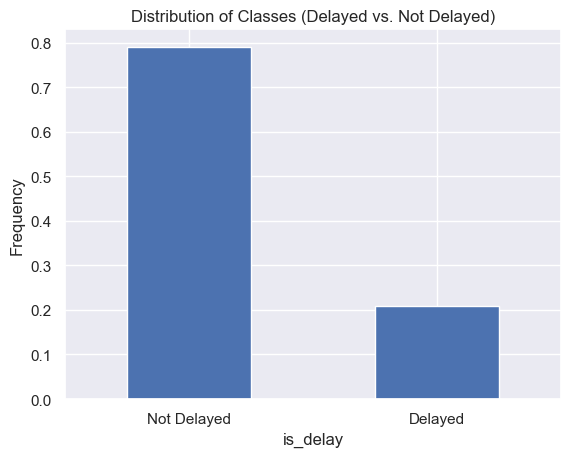

In [23]:
import matplotlib.pyplot as plt

# Group the data by the 'is_delay' column and calculate the frequency
class_distribution = (data.groupby('is_delay').size() / len(data)).plot(kind='bar')

# Add labels and title to the plot
plt.ylabel('Frequency')
plt.title('Distribution of Classes (Delayed vs. Not Delayed)')
plt.xticks([0, 1], ['Not Delayed', 'Delayed'], rotation=0)

# Show the plot
plt.show()


**Question**: What can you deduce from the bar plot about the ratio of delay vs. no delay?

###### From the bar plot, we can deduce the following about the ratio of delay vs. no delay:

###### The majority of the data points fall under the "Not Delayed" category.
###### The frequency of "Not Delayed" occurrences is approximately 3 times higher than the "Delayed" occurrences.
###### The "Delayed" category represents a significantly smaller proportion of the data compared to the "Not Delayed" category.
###### In summary, there are significantly more instances that are not delayed compared to those that are delayed.

**Questions**: 

- Which months have the most delays?
- What time of the day has the most delays?
- What day of the week has the most delays?
- Which airline has the most delays?
- Which origin and destination airports have the most delays?
- Is flight distance a factor in the delays?

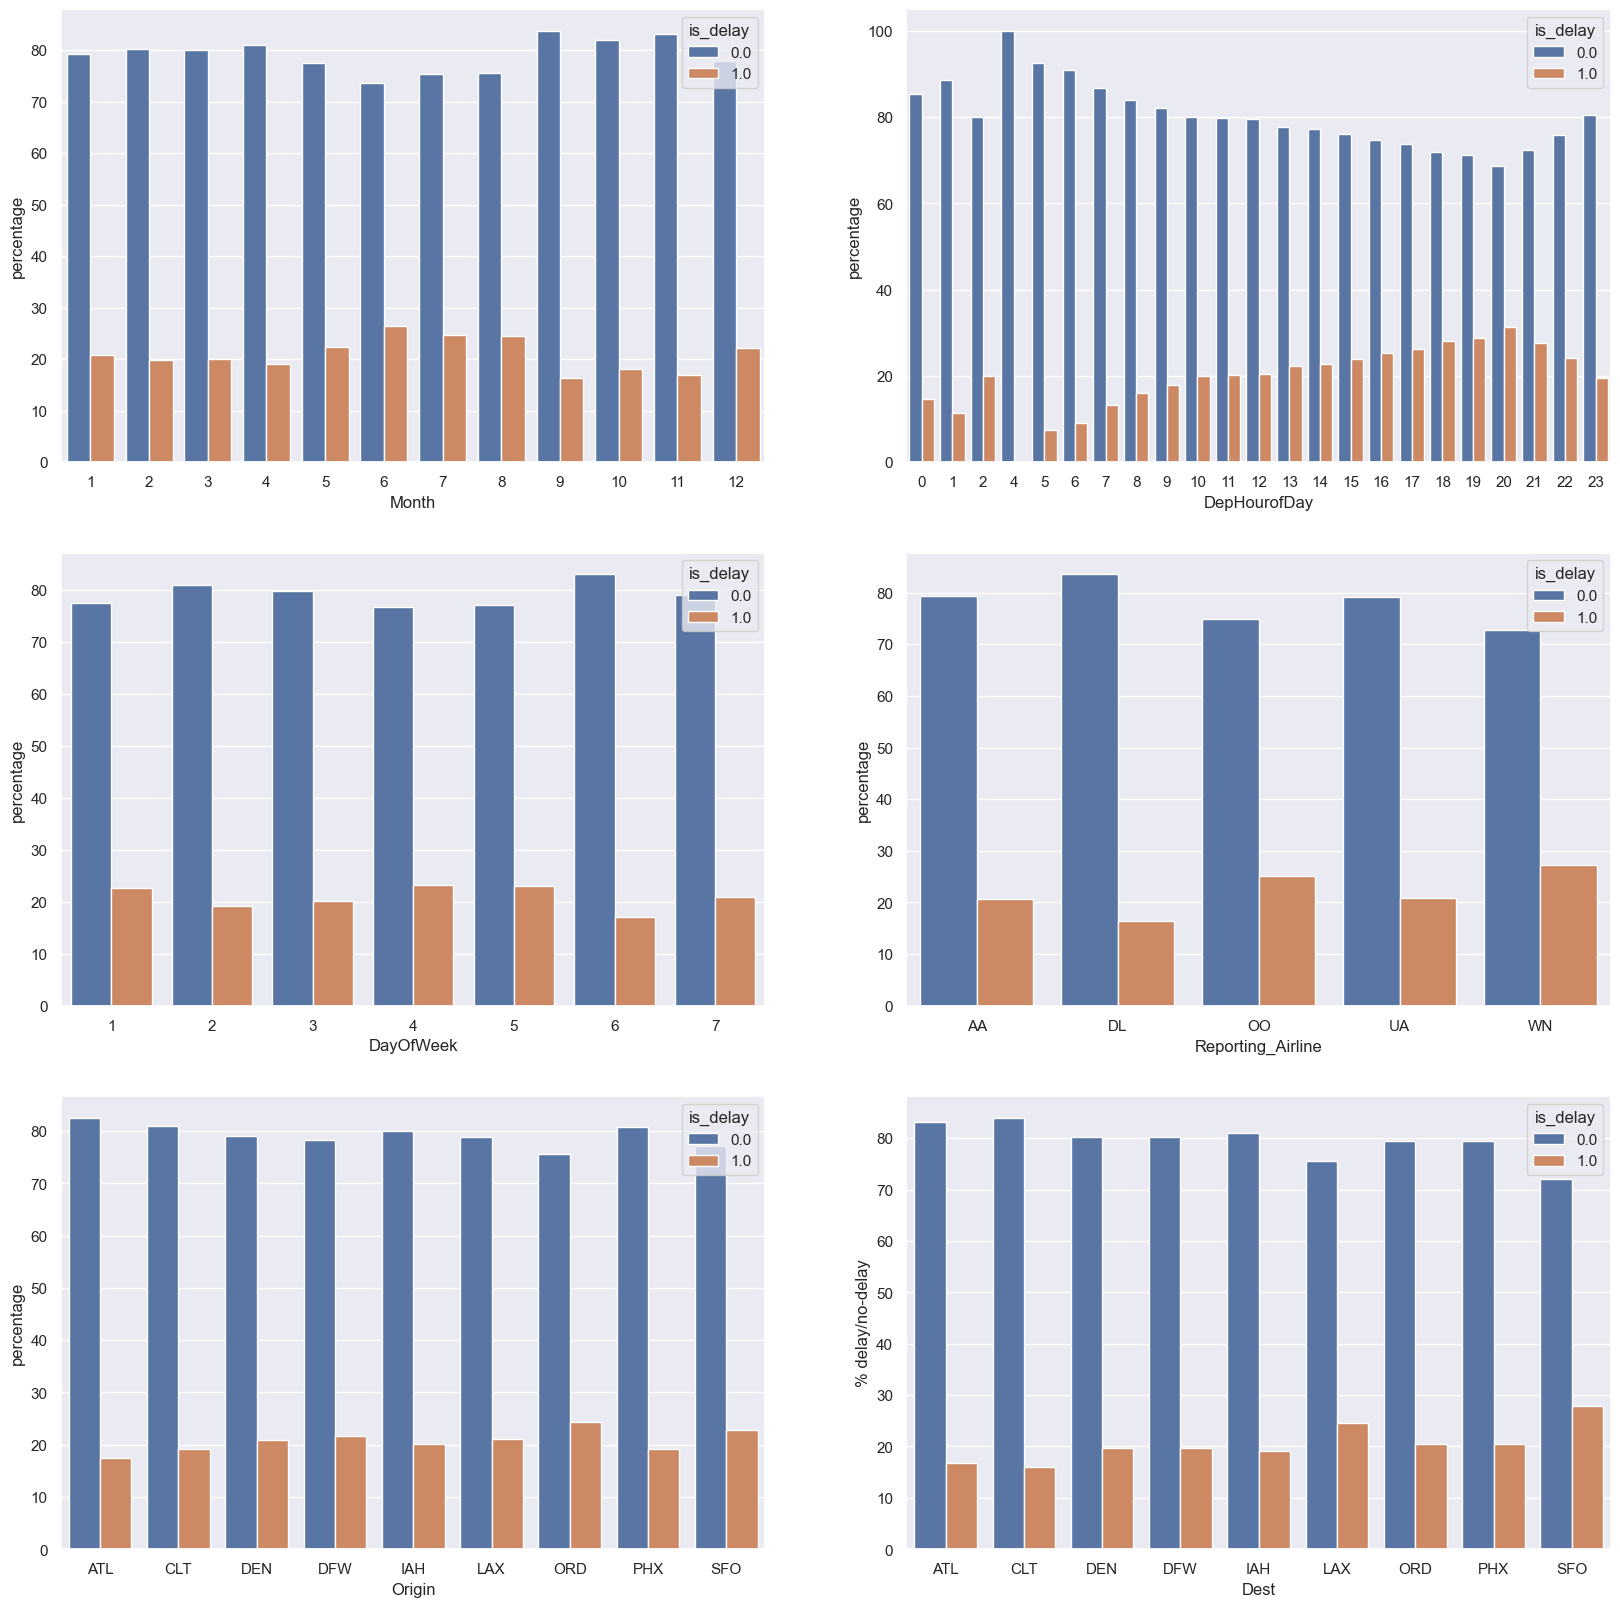

In [24]:
viz_columns = ['Month', 'DepHourofDay', 'DayOfWeek', 'Reporting_Airline', 'Origin', 'Dest']
fig, axes = plt.subplots(3, 2, figsize=(20,20), squeeze=False)
# fig.autofmt_xdate(rotation=90)

for idx, column in enumerate(viz_columns):
    ax = axes[idx//2, idx%2]
    temp = data.groupby(column)['is_delay'].value_counts(normalize=True).rename('percentage').\
    mul(100).reset_index().sort_values(column)
    sns.barplot(x=column, y="percentage", hue="is_delay", data=temp, ax=ax)
    plt.ylabel('% delay/no-delay')
    

plt.show()

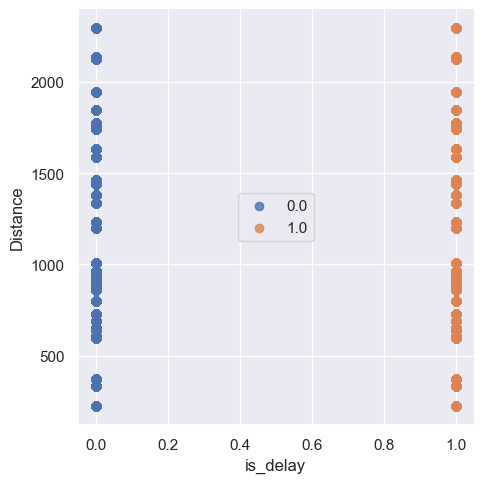

In [25]:
sns.lmplot( x="is_delay", y="Distance", data=data, fit_reg=False, hue='is_delay', legend=False)
plt.legend(loc='center')
plt.xlabel('is_delay')
plt.ylabel('Distance')
plt.show()

Based on the above figures, enter your answers to the above questions here and turn the cell type to markdown

1) Which months have the most delays?

-> The graph shows that all months have roughly similar percentages of delays, but it appears that the months of June, July, and December have slightly higher delay percentages compared to other months.

2) What time of the day has the most delays?

-> The graph for 'DepHourOfDay' (Departure Hour of Day) shows considerable variation. Late night (around 23:00) and early morning hours (around 4:00-5:00) have higher percentages of delays. Hours between 8:00 to 20:00 have more consistent delay patterns.

3) What day of the week has the most delays?

-> Delays are quite consistent across days of the week, but it seems that Day 4 (which might correspond to Wednesday or Thursday depending on the dataset) has a slightly higher percentage of delays compared to other days.

4) Which airline has the most delays?

-> The 'Reporting_Airline' graph indicates that OO airline has the highest percentage of delays, followed by WN. AA, DL, and UA have comparatively lower delay percentages.

5) Which origin and destination airports have the most delays?

-> For origin airports, IAH, LAX, and ORD seem to have slightly higher delay percentages compared to other airports.
For destination airports, the pattern is similar with IAH, LAX, and ORD having higher delay percentages.

6) Is flight distance a factor in the delays?

-> The scatter plot shows flights with both short and long distances experience delays. However, there's no clear trend indicating that distance is a major factor in determining delays. Both short-distance and long-distance flights have instances of delays (is_delay = 1.0) and no-delays (is_delay = 0.0).


### Features

Look at all the columns and what their specific types are.

In [26]:
data.columns

Index(['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightDate',
       'Reporting_Airline', 'Origin', 'OriginState', 'Dest', 'DestState',
       'CRSDepTime', 'Cancelled', 'Diverted', 'Distance', 'DistanceGroup',
       'ArrDelay', 'ArrDelayMinutes', 'is_delay', 'AirTime', 'DepHourofDay'],
      dtype='object')

In [27]:
data.dtypes

Year                   int64
Quarter                int64
Month                  int64
DayofMonth             int64
DayOfWeek              int64
FlightDate            object
Reporting_Airline     object
Origin                object
OriginState           object
Dest                  object
DestState             object
CRSDepTime             int64
Cancelled            float64
Diverted             float64
Distance             float64
DistanceGroup          int64
ArrDelay             float64
ArrDelayMinutes      float64
is_delay             float64
AirTime              float64
DepHourofDay           int64
dtype: object

Filtering the required columns:
- Date is redundant, because you have Year, Quarter, Month, DayofMonth, and DayOfWeek to describe the date.
- Use Origin and Dest codes instead of OriginState and DestState.
- Because you are just classifying whether the flight is delayed or not, you don't need TotalDelayMinutes, DepDelayMinutes, and ArrDelayMinutes.

Treat DepHourofDay as a categorical variable because it doesn't have any quantitative relation with the target.
- If you had to do a one-hot encoding of it, it would result in 23 more columns.
- Other alternatives to handling categorical variables include hash encoding, regularized mean encoding, and bucketizing the values, among others.
- Just split into buckets here.

**Hint**: To change a column type to category, use the `astype` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.astype.html)).

In [28]:
data_orig = data.copy()
data = data[[ 'is_delay', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 
       'Reporting_Airline', 'Origin', 'Dest','Distance','DepHourofDay']]
categorical_columns  = ['Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 
       'Reporting_Airline', 'Origin', 'Dest', 'DepHourofDay']
for c in categorical_columns:
    data[c] = data[c].astype('category')# Enter your code here

In [29]:
data_orig.head(5)

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,Origin,OriginState,Dest,...,CRSDepTime,Cancelled,Diverted,Distance,DistanceGroup,ArrDelay,ArrDelayMinutes,is_delay,AirTime,DepHourofDay
0,2014,4,10,1,3,2014-10-01,AA,DFW,TX,SFO,...,755,0.0,0.0,1464.0,6,-9.0,0.0,0.0,195.0,7
1,2014,4,10,2,4,2014-10-02,AA,DFW,TX,SFO,...,755,0.0,0.0,1464.0,6,40.0,40.0,1.0,199.0,7
2,2014,4,10,3,5,2014-10-03,AA,DFW,TX,SFO,...,755,0.0,0.0,1464.0,6,9.0,9.0,0.0,196.0,7
3,2014,4,10,4,6,2014-10-04,AA,DFW,TX,SFO,...,755,0.0,0.0,1464.0,6,-16.0,0.0,0.0,195.0,7
4,2014,4,10,5,7,2014-10-05,AA,DFW,TX,SFO,...,755,0.0,0.0,1464.0,6,-8.0,0.0,0.0,192.0,7


To use one-hot encoding, use the Pandas `get_dummies` function for the categorical columns that you selected above. Then, you can concatenate those generated features to your original dataset using the Pandas `concat` function. For encoding categorical variables, you can also use *dummy encoding* by using a keyword `drop_first=True`. For more information on dummy encoding, see https://en.wikiversity.org/wiki/Dummy_variable_(statistics).

For example:
```
pd.get_dummies(df[['column1','columns2']], drop_first=True)
```

In [30]:
data_dummies = pd.get_dummies(data[categorical_columns], drop_first=True) # Enter your code here
data = pd.concat([data, data_dummies], axis = 1)
data.drop(categorical_columns,axis=1, inplace=True)# Enter your code here

Check the length of the dataset and the new columnms.

In [31]:
# Check the number of rows in the dataset
length_of_dataset = len(data)

print(f"The number of rows in the dataset is: {length_of_dataset}")

The number of rows in the dataset is: 1635590


In [32]:
# List of columns in the dataset
columns_in_data = data.columns

print(f"The columns in the dataset are: {columns_in_data}")

The columns in the dataset are: Index(['is_delay', 'Distance', 'Quarter_2', 'Quarter_3', 'Quarter_4',
       'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6', 'Month_7',
       'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12',
       'DayofMonth_2', 'DayofMonth_3', 'DayofMonth_4', 'DayofMonth_5',
       'DayofMonth_6', 'DayofMonth_7', 'DayofMonth_8', 'DayofMonth_9',
       'DayofMonth_10', 'DayofMonth_11', 'DayofMonth_12', 'DayofMonth_13',
       'DayofMonth_14', 'DayofMonth_15', 'DayofMonth_16', 'DayofMonth_17',
       'DayofMonth_18', 'DayofMonth_19', 'DayofMonth_20', 'DayofMonth_21',
       'DayofMonth_22', 'DayofMonth_23', 'DayofMonth_24', 'DayofMonth_25',
       'DayofMonth_26', 'DayofMonth_27', 'DayofMonth_28', 'DayofMonth_29',
       'DayofMonth_30', 'DayofMonth_31', 'DayOfWeek_2', 'DayOfWeek_3',
       'DayOfWeek_4', 'DayOfWeek_5', 'DayOfWeek_6', 'DayOfWeek_7',
       'Reporting_Airline_DL', 'Reporting_Airline_OO', 'Reporting_Airline_UA',
       'Reporting_Airline_

**Sample Answer:** 
```
Index(['Distance', 'is_delay', 'Quarter_2', 'Quarter_3', 'Quarter_4',
       'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6', 'Month_7',
       'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12',
       'DayofMonth_2', 'DayofMonth_3', 'DayofMonth_4', 'DayofMonth_5',
       'DayofMonth_6', 'DayofMonth_7', 'DayofMonth_8', 'DayofMonth_9',
       'DayofMonth_10', 'DayofMonth_11', 'DayofMonth_12', 'DayofMonth_13',
       'DayofMonth_14', 'DayofMonth_15', 'DayofMonth_16', 'DayofMonth_17',
       'DayofMonth_18', 'DayofMonth_19', 'DayofMonth_20', 'DayofMonth_21',
       'DayofMonth_22', 'DayofMonth_23', 'DayofMonth_24', 'DayofMonth_25',
       'DayofMonth_26', 'DayofMonth_27', 'DayofMonth_28', 'DayofMonth_29',
       'DayofMonth_30', 'DayofMonth_31', 'DayOfWeek_2', 'DayOfWeek_3',
       'DayOfWeek_4', 'DayOfWeek_5', 'DayOfWeek_6', 'DayOfWeek_7',
       'Reporting_Airline_DL', 'Reporting_Airline_OO', 'Reporting_Airline_UA',
       'Reporting_Airline_WN', 'Origin_CLT', 'Origin_DEN', 'Origin_DFW',
       'Origin_IAH', 'Origin_LAX', 'Origin_ORD', 'Origin_PHX', 'Origin_SFO',
       'Dest_CLT', 'Dest_DEN', 'Dest_DFW', 'Dest_IAH', 'Dest_LAX', 'Dest_ORD',
       'Dest_PHX', 'Dest_SFO'],
      dtype='object')
```

Now you are ready to do model training. Before splitting the data, rename the column `is_delay` to `target`.

**Hint**: You can use the Pandas `rename` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html)).

In [33]:
data.rename(columns={'is_delay': 'target'}, inplace=True)

In [34]:
# write code to Save the combined csv file (combined_csv_v1.csv) to your local computer
# note this combined file will be used in part B

csv_v1_path = './data/data_extracted/combined_csv_v1.csv'
for col in data.select_dtypes(include=['bool']).columns:
    data[col] = data[col].astype(int)
data.to_csv(csv_v1_path, index=False)




# Step 3: Model training and evaluation

1. Split the data into `train_data`, and `test_data` using `sklearn.model_selection.train_test_split`.  
2. Build a logistic regression model for the data, where training data is 80%, and test data is 20%.

Use the following cells to complete these steps. Insert and delete cells where needed.


### Train test split

In [35]:
# write Code here to split data into train, validate and test
from sklearn.model_selection import train_test_split

# Assuming your data is loaded into a DataFrame called "data"
X = data.drop('target', axis=1)
y = data['target']

train_data, test_data, train_labels, test_labels = train_test_split(X, y, test_size=0.20, random_state=42)


### Baseline classification model

In [36]:
# <write code here>
from sklearn.linear_model import LogisticRegression

# Initialize the model
logreg = LogisticRegression(max_iter=10000)  # max_iter set to a large number for convergence

# Train the model
logreg.fit(train_data, train_labels)

# Predict on test data
target_predicted = logreg.predict(test_data)


## Model evaluation
In this section, you'll evaluate your trained model on test data and report on the following metrics:
* Confusion Matrix plot
* Plot the ROC
* Report statistics such as Accuracy, Percision, Recall, Sensitivity and Specificity

To view a plot of the confusion matrix, and various scoring metrics, create a couple of functions:

In [38]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(test_labels, target_predicted):
    cm = confusion_matrix(test_labels, target_predicted)
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
    classNames = ['Negative','Positive']
    plt.title('Confusion Matrix')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, rotation=45)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
    plt.show()



In [39]:
from sklearn import metrics

def plot_roc(test_labels, target_predicted):
    fpr, tpr, _ = metrics.roc_curve(test_labels, target_predicted)
    auc = metrics.roc_auc_score(test_labels, target_predicted)
    plt.plot(fpr, tpr, label="data 1, auc="+str(auc))
    plt.legend(loc=4)
    plt.show()

    # Print other metrics
    accuracy = metrics.accuracy_score(test_labels, target_predicted)
    precision = metrics.precision_score(test_labels, target_predicted)
    recall = metrics.recall_score(test_labels, target_predicted)
    sensitivity = recall
    
    # Compute confusion matrix within the function
    cm = confusion_matrix(test_labels, target_predicted)
    specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])

    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall (Sensitivity): {sensitivity}")
    print(f"Specificity: {specificity}")


To plot the confusion matrix, call the `plot_confusion_matrix` function on the `test_labels` and `target_predicted` data from your batch job:

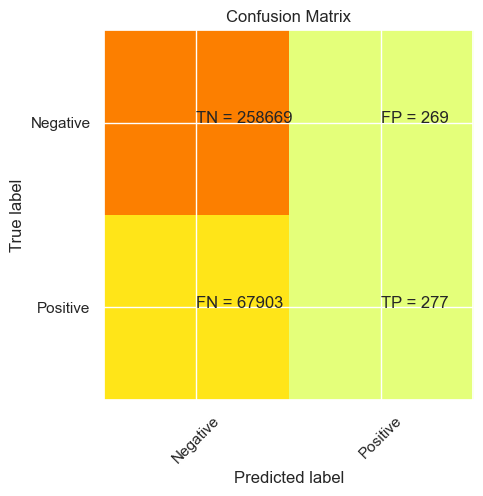

In [40]:
# Enter you code here

plot_confusion_matrix(test_labels, target_predicted)

To print statistics and plot an ROC curve, call the `plot_roc` function on the `test_labels` and `target_predicted` data from your batch job:

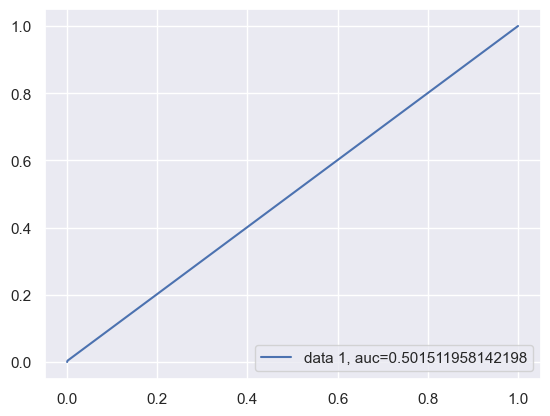

Accuracy: 0.7915981388978901
Precision: 0.5073260073260073
Recall (Sensitivity): 0.004062775007333529
Specificity: 0.9989611412770625


In [41]:
# Enter you code here

plot_roc(test_labels, target_predicted)

### Key questions to consider:
1. How does your model's performance on the test set compare to the training set? What can you deduce from this comparison? 

-> The test metrics significantly deviate from the training metrics, it may suggest overfitting (where the model performs well on the training data but poorly on new, unseen data) or underfitting (where the model performs poorly on both training and test data).

2. Are there obvious differences between the outcomes of metrics like accuracy, precision, and recall? If so, why might you be seeing those differences? 

-> Yes, there are differences. The model's accuracy is approximately 0.7195, which suggests that about 72% of the total predictions were correct. However, when looking at precision (0.5073) and recall (0.0040), we see a discrepancy. The precision indicates that only about 50.73% of positive predictions were actually true positives. The very low recall (0.4%) suggests the model is not capturing most of the actual positive cases. This could be due to class imbalance, where one class (e.g., 'Negative') vastly outnumbers the other (e.g., 'Positive').

3. Is the outcome for the metric(s) you consider most important sufficient for what you need from a business standpoint? If not, what are some things you might change in your next iteration (in the feature engineering section, which is coming up next)? 

-> The answer to this depends on the business problem at hand. For instance, if it's crucial not to miss any positive cases (e.g., disease diagnosis), then a low recall is problematic. To improve the model:

Resampling: Address class imbalance by oversampling the minority class or undersampling the majority class.

Use Different Algorithms: Some algorithms might handle imbalances better than others.

Feature Engineering: Introduce new features or transform existing ones to help the model distinguish between classes.

Tuning Model Parameters: Adjusting parameters might yield better results for imbalanced datasets.

Using Different Evaluation Metrics: Instead of accuracy, using metrics like the F1 score, which considers both precision and recall, might be more appropriate.

Use the cells below to answer these and other questions. Insert and delete cells where needed.


**Question**: What can you summarize from the confusion matrix?


-> From the confusion matrix, the following can be summarized:

True Negatives (TN) - 2,586,669: This is the number of negative instances that were correctly classified as negative. A large number of the negative cases were correctly predicted.

False Positives (FP) - 269: This represents the number of negative instances that were incorrectly classified as positive. It's a relatively small number in comparison to the true negatives, meaning that there were very few false alarms.

False Negatives (FN) - 67,903: This is the number of positive instances that were incorrectly classified as negative. This is a concerning number because a significant number of positive cases were missed.

True Positives (TP) - 277: This represents the number of positive instances that were correctly classified as positive. It's a very small number compared to the false negatives, highlighting that the model struggles with correctly identifying positive cases.

The model seems to be biased towards predicting the 'Negative' class, which is evident from the high number of TN and the significantly high number of FN. This results in a low recall (sensitivity) of around 0.0040, meaning the model is capturing only a small fraction of the actual positive cases.

The specificity, on the other hand, is approximately 0.9998, which indicates that the model is excellent at capturing the true negative cases.

In summary, the model has a high accuracy mainly driven by the correct prediction of the negative cases. However, it struggles with predicting the positive class, as evidenced by the high number of false negatives and the low number of true positives. This may suggest that there is an imbalance in the dataset, with a lot more negative instances than positive ones. The model's current configuration seems to prioritize specificity over sensitivity, which might not be ideal for all applications, especially if detecting positive cases is crucial.

# Step 4: Deployment

1. In this step you are required to push your source code and requirements file to a GitLab repository without the data files. Please use the Git commands to complete this task
2- Create a “readme.md” markdown file that describes the code of this repository and how to run it and what the user would expect if got the code running.

In the cell below provide the link of the pushed repository on your GitLab account.


In [42]:
### Provide a link for your Gitlab repository here

# Iteration II

# Step 5: Feature engineering

You've now gone through one iteration of training and evaluating your model. Given that the outcome you reached for your model the first time probably wasn't sufficient for solving your business problem, what are some things you could change about your data to possibly improve model performance?

### Key questions to consider:
1. How might the balance of your two main classes (delay and no delay) impact model performance?
2. Do you have any features that are correlated?
3. Are there feature reduction techniques you could perform at this stage that might have a positive impact on model performance? 
4. Can you think of adding some more data/datasets?
4. After performing some feature engineering, how does your model performance compare to the first iteration?

Use the cells below to perform specific feature engineering techniques (per the questions above) that you think could improve your model performance. Insert and delete cells where needed.


Before you start, think about why the precision and recall are around 80% while the accuracy is 99%.

#### Add more features

1. Holidays
2. Weather

Because the list of holidays from 2014 to 2018 is known, you can create an indicator variable **is_holiday** to mark these.
The hypothesis is that airplane delays could be higher during holidays compared to the rest of the days. Add a boolean variable `is_holiday` that includes the holidays for the years 2014-2018.

In [43]:
# Source: http://www.calendarpedia.com/holidays/federal-holidays-2014.html

holidays_14 = ['2014-01-01',  '2014-01-20', '2014-02-17', '2014-05-26', '2014-07-04', '2014-09-01', '2014-10-13', '2014-11-11', '2014-11-27', '2014-12-25' ] 
holidays_15 = ['2015-01-01',  '2015-01-19', '2015-02-16', '2015-05-25', '2015-06-03', '2015-07-04', '2015-09-07', '2015-10-12', '2015-11-11', '2015-11-26', '2015-12-25'] 
holidays_16 = ['2016-01-01',  '2016-01-18', '2016-02-15', '2016-05-30', '2016-07-04', '2016-09-05', '2016-10-10', '2016-11-11', '2016-11-24', '2016-12-25', '2016-12-26']
holidays_17 = ['2017-01-02', '2017-01-16', '2017-02-20', '2017-05-29' , '2017-07-04', '2017-09-04' ,'2017-10-09', '2017-11-10', '2017-11-23', '2017-12-25']
holidays_18 = ['2018-01-01', '2018-01-15', '2018-02-19', '2018-05-28' , '2018-07-04', '2018-09-03' ,'2018-10-08', '2018-11-12','2018-11-22', '2018-12-25']
holidays = holidays_14+ holidays_15+ holidays_16 + holidays_17+ holidays_18

### Add indicator variable for holidays
data_orig['is_holiday'] = data_orig['FlightDate'].isin(holidays).astype(int)

In [44]:
data_orig.columns

Index(['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightDate',
       'Reporting_Airline', 'Origin', 'OriginState', 'Dest', 'DestState',
       'CRSDepTime', 'Cancelled', 'Diverted', 'Distance', 'DistanceGroup',
       'ArrDelay', 'ArrDelayMinutes', 'is_delay', 'AirTime', 'DepHourofDay',
       'is_holiday'],
      dtype='object')

Weather data was fetched from https://www.ncei.noaa.gov/access/services/data/v1?dataset=daily-summaries&stations=USW00023174,USW00012960,USW00003017,USW00094846,USW00013874,USW00023234,USW00003927,USW00023183,USW00013881&dataTypes=AWND,PRCP,SNOW,SNWD,TAVG,TMIN,TMAX&startDate=2014-01-01&endDate=2018-12-31.
<br>

This dataset has information on wind speed, precipitation, snow, and temperature for cities by their airport codes.

**Question**: Could bad weather due to rains, heavy winds, or snow lead to airplane delay? Let's check!

In [45]:
import requests
import os

# Specify the URL for the data download
url = "https://www.ncei.noaa.gov/access/services/data/v1?dataset=daily-summaries&stations=USW00023174,USW00012960,USW00003017,USW00094846,USW00013874,USW00023234,USW00003927,USW00023183,USW00013881&dataTypes=AWND,PRCP,SNOW,SNWD,TAVG,TMIN,TMAX&startDate=2014-01-01&endDate=2018-12-31"

# Specify the local directory where you want to save the downloaded files
csv_path = './data/data_extracted/weather/'

# Create the directory if it doesn't exist
os.makedirs(csv_path, exist_ok=True)

# Specify the desired filename
filename = "daily-summaries-2023-10-28T09-11-28.csv"

# Specify the full local path for saving the file
local_filepath = os.path.join(csv_path, filename)

# Send an HTTP GET request to download the file
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Save the file to the specified directory with the desired filename
    with open(local_filepath, 'wb') as file:
        file.write(response.content)
    
    print(f"File '{filename}' has been downloaded and saved to '{csv_path}'")
else:
    print(f"Failed to download file from URL. Status code: {response.status_code}")


File 'daily-summaries-2023-10-28T09-11-28.csv' has been downloaded and saved to './data/data_extracted/weather/'


Import weather data prepared for the airport codes in our dataset. Use the stations and airports below for the analysis, and create a new column called `airport` that maps the weather station to the airport name.

In [46]:
weather = pd.read_csv('./data/data_extracted/weather/daily-summaries-2023-10-28T09-11-28.csv') # Enter your code here to read 'daily-summaries.csv' file
station = ['USW00023174','USW00012960','USW00003017','USW00094846',
           'USW00013874','USW00023234','USW00003927','USW00023183','USW00013881'] 
airports = ['LAX', 'IAH', 'DEN', 'ORD', 'ATL', 'SFO', 'DFW', 'PHX', 'CLT']

# Create a dictionary to map stations to airports
station_map = dict(zip(station, airports))

# Map weather stations to airport code using the station_map dictionary
weather['airport'] = weather['STATION'].map(station_map)

# Display the weather DataFrame with the 'airport' column
weather.columns

Index(['STATION', 'DATE', 'AWND', 'PRCP', 'SNOW', 'SNWD', 'TAVG', 'TMAX',
       'TMIN', 'airport'],
      dtype='object')

In [47]:
weather.columns

Index(['STATION', 'DATE', 'AWND', 'PRCP', 'SNOW', 'SNWD', 'TAVG', 'TMAX',
       'TMIN', 'airport'],
      dtype='object')

Create another column called `MONTH` from the `DATE` column.

In [48]:
weather['MONTH'] = weather['DATE'].apply(lambda x: x.split('-')[1])
weather.head()

,STATION,DATE,AWND,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,airport,MONTH
0,USW00023174,2014-01-01,16,0,NaN,NaN,131.0,178.0,78.0,LAX,01
1,USW00023174,2014-01-02,22,0,NaN,NaN,159.0,256.0,100.0,LAX,01
2,USW00023174,2014-01-03,17,0,NaN,NaN,140.0,178.0,83.0,LAX,01
3,USW00023174,2014-01-04,18,0,NaN,NaN,136.0,183.0,100.0,LAX,01
4,USW00023174,2014-01-05,18,0,NaN,NaN,151.0,244.0,83.0,LAX,01


### Sample output
```
  STATION     DATE      AWND PRCP SNOW SNWD TAVG TMAX  TMIN airport MONTH
0 USW00023174 2014-01-01 16   0   NaN  NaN 131.0 178.0 78.0  LAX    01
1 USW00023174 2014-01-02 22   0   NaN  NaN 159.0 256.0 100.0 LAX    01
2 USW00023174 2014-01-03 17   0   NaN  NaN 140.0 178.0 83.0  LAX    01
3 USW00023174 2014-01-04 18   0   NaN  NaN 136.0 183.0 100.0 LAX    01
4 USW00023174 2014-01-05 18   0   NaN  NaN 151.0 244.0 83.0  LAX    01
```

Analyze and handle the `SNOW` and `SNWD` columns for missing values using `fillna()`. Use the `isna()` function to check the missing values for all the columns.

In [49]:
# Fill missing values in 'SNOW' and 'SNWD' columns with 0
weather['SNOW'].fillna(0, inplace=True)
weather['SNWD'].fillna(0, inplace=True)
weather.isna().sum()

STATION     0
DATE        0
AWND        0
PRCP        0
SNOW        0
SNWD        0
TAVG       62
TMAX       20
TMIN       20
airport     0
MONTH       0
dtype: int64

**Question**: Print the index of the rows that have missing values for TAVG, TMAX, TMIN.

**Hint**: Use the `isna()` function to find the rows that are missing, and then use the list on the idx variable to get the index.

In [50]:
# Create an array of indices
idx = np.array([i for i in range(len(weather))])

# Find rows with missing values in 'TAVG'
TAVG_idx = idx[weather['TAVG'].isna()]

# Find rows with missing values in 'TMAX'
TMAX_idx = idx[weather['TMAX'].isna()]

# Find rows with missing values in 'TMIN'
TMIN_idx = idx[weather['TMIN'].isna()]

# Print the indices
TAVG_idx, TMAX_idx, TMIN_idx


(array([ 3956,  3957,  3958,  3959,  3960,  3961,  3962,  3963,  3964,
         3965,  3966,  3967,  3968,  3969,  3970,  3971,  3972,  3973,
         3974,  3975,  3976,  3977,  3978,  3979,  3980,  3981,  3982,
         3983,  3984,  3985,  4017,  4018,  4019,  4020,  4021,  4022,
         4023,  4024,  4025,  4026,  4027,  4028,  4029,  4030,  4031,
         4032,  4033,  4034,  4035,  4036,  4037,  4038,  4039,  4040,
         4041,  4042,  4043,  4044,  4045,  4046,  4047, 13420]),
 array([10763, 10764, 10765, 10766, 10767, 10768, 10769, 10770, 10771,
        10772, 10773, 10774, 10775, 10776, 10777, 10778, 10779, 10780,
        10781, 10782]),
 array([10763, 10764, 10765, 10766, 10767, 10768, 10769, 10770, 10771,
        10772, 10773, 10774, 10775, 10776, 10777, 10778, 10779, 10780,
        10781, 10782]))

### Sample output

```
array([ 3956,  3957,  3958,  3959,  3960,  3961,  3962,  3963,  3964,
        3965,  3966,  3967,  3968,  3969,  3970,  3971,  3972,  3973,
        3974,  3975,  3976,  3977,  3978,  3979,  3980,  3981,  3982,
        3983,  3984,  3985,  4017,  4018,  4019,  4020,  4021,  4022,
        4023,  4024,  4025,  4026,  4027,  4028,  4029,  4030,  4031,
        4032,  4033,  4034,  4035,  4036,  4037,  4038,  4039,  4040,
        4041,  4042,  4043,  4044,  4045,  4046,  4047, 13420])
```

You can replace the missing TAVG, TMAX, and TMIN with the average value for a particular station/airport. Because the consecutive rows of TAVG_idx are missing, replacing with a previous value would not be possible. Instead, replace it with the mean. Use the `groupby` function to aggregate the variables with a mean value.

In [51]:
weather_impute = weather.groupby(['MONTH', 'STATION']).agg({'TAVG':'mean', 'TMAX':'mean', 'TMIN':'mean'}).reset_index()
weather_impute.head(2)


,MONTH,STATION,TAVG,TMAX,TMIN
0,01,USW00003017,-2.741935,74.000000,-69.858065
1,01,USW00003927,79.529032,143.767742,20.696774


Merge the mean data with the weather data.

In [52]:
### get the yesterday's data
weather = pd.merge(weather, weather_impute,  how='left', left_on=['MONTH','STATION'], right_on = ['MONTH','STATION'])\
.rename(columns = {'TAVG_y':'TAVG_AVG',
                   'TMAX_y':'TMAX_AVG', 
                   'TMIN_y':'TMIN_AVG',
                   'TAVG_x':'TAVG',
                   'TMAX_x':'TMAX', 
                   'TMIN_x':'TMIN'})

Check for missing values again.

In [53]:
weather.TAVG[TAVG_idx] = weather.TAVG_AVG[TAVG_idx]
weather.TMAX[TMAX_idx] = weather.TMAX_AVG[TMAX_idx]
weather.TMIN[TMIN_idx] = weather.TMIN_AVG[TMIN_idx]
weather.isna().sum()

STATION     0
DATE        0
AWND        0
PRCP        0
SNOW        0
SNWD        0
TAVG        0
TMAX        0
TMIN        0
airport     0
MONTH       0
TAVG_AVG    0
TMAX_AVG    0
TMIN_AVG    0
dtype: int64

Drop `STATION,MONTH,TAVG_AVG,TMAX_AVG,TMIN_AVG,TMAX,TMIN,SNWD` from the dataset

In [54]:
weather.drop(columns=['STATION','MONTH','TAVG_AVG', 'TMAX_AVG', 'TMIN_AVG', 'TMAX' ,'TMIN', 'SNWD'],inplace=True)

Add the origin and destination weather conditions to the dataset.

In [55]:
### Add origin weather conditions
data_orig = pd.merge(data_orig, weather,  how='left', left_on=['FlightDate','Origin'], right_on = ['DATE','airport'])\
.rename(columns = {'AWND':'AWND_O','PRCP':'PRCP_O', 'TAVG':'TAVG_O', 'SNOW': 'SNOW_O'})\
.drop(columns=['DATE','airport'])

### Add destination weather conditions
data_orig = pd.merge(data_orig, weather,  how='left', left_on=['FlightDate','Dest'], right_on = ['DATE','airport'])\
.rename(columns = {'AWND':'AWND_D','PRCP':'PRCP_D', 'TAVG':'TAVG_D', 'SNOW': 'SNOW_D'})\
.drop(columns=['DATE','airport'])

**Note**: It is always a good practice to check nulls/NAs after joins.

In [56]:
sum(data.isna().any())

0

In [57]:
data_orig.columns

Index(['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightDate',
       'Reporting_Airline', 'Origin', 'OriginState', 'Dest', 'DestState',
       'CRSDepTime', 'Cancelled', 'Diverted', 'Distance', 'DistanceGroup',
       'ArrDelay', 'ArrDelayMinutes', 'is_delay', 'AirTime', 'DepHourofDay',
       'is_holiday', 'AWND_O', 'PRCP_O', 'SNOW_O', 'TAVG_O', 'AWND_D',
       'PRCP_D', 'SNOW_D', 'TAVG_D'],
      dtype='object')

Convert the categorical data into numerical data using one-hot encoding.

In [58]:
data = data_orig.copy()
data = data[['is_delay', 'Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 
       'Reporting_Airline', 'Origin', 'Dest','Distance','DepHourofDay','is_holiday', 'AWND_O', 'PRCP_O',
       'TAVG_O', 'AWND_D', 'PRCP_D', 'TAVG_D', 'SNOW_O', 'SNOW_D']]


categorical_columns  = ['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 
       'Reporting_Airline', 'Origin', 'Dest', 'is_holiday']
for c in categorical_columns:
    data[c] = data[c].astype('category')

In [59]:
# Generate dummy columns for each categorical column
data_dummies = pd.get_dummies(data[categorical_columns], drop_first=True)

# Concatenate the dummy columns with the original dataset
data = pd.concat([data, data_dummies], axis=1)

# Drop the original categorical columns
data.drop(categorical_columns, axis=1, inplace=True)


### Sample code

```
data_dummies = pd.get_dummies(data[['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'Reporting_Airline', 'Origin', 'Dest', 'is_holiday']], drop_first=True)
data = pd.concat([data, data_dummies], axis = 1)
categorical_columns.remove('is_delay')
data.drop(categorical_columns,axis=1, inplace=True)
```

Check the new columns.

In [60]:
data.columns

Index(['is_delay', 'Distance', 'DepHourofDay', 'AWND_O', 'PRCP_O', 'TAVG_O',
       'AWND_D', 'PRCP_D', 'TAVG_D', 'SNOW_O', 'SNOW_D', 'Year_2015',
       'Year_2016', 'Year_2017', 'Year_2018', 'Quarter_2', 'Quarter_3',
       'Quarter_4', 'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6',
       'Month_7', 'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12',
       'DayofMonth_2', 'DayofMonth_3', 'DayofMonth_4', 'DayofMonth_5',
       'DayofMonth_6', 'DayofMonth_7', 'DayofMonth_8', 'DayofMonth_9',
       'DayofMonth_10', 'DayofMonth_11', 'DayofMonth_12', 'DayofMonth_13',
       'DayofMonth_14', 'DayofMonth_15', 'DayofMonth_16', 'DayofMonth_17',
       'DayofMonth_18', 'DayofMonth_19', 'DayofMonth_20', 'DayofMonth_21',
       'DayofMonth_22', 'DayofMonth_23', 'DayofMonth_24', 'DayofMonth_25',
       'DayofMonth_26', 'DayofMonth_27', 'DayofMonth_28', 'DayofMonth_29',
       'DayofMonth_30', 'DayofMonth_31', 'DayOfWeek_2', 'DayOfWeek_3',
       'DayOfWeek_4', 'DayOfWeek_5', 'DayO

### Sample output

```
Index(['Distance', 'DepHourofDay', 'is_delay', 'AWND_O', 'PRCP_O', 'TAVG_O',
       'AWND_D', 'PRCP_D', 'TAVG_D', 'SNOW_O', 'SNOW_D', 'Year_2015',
       'Year_2016', 'Year_2017', 'Year_2018', 'Quarter_2', 'Quarter_3',
       'Quarter_4', 'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6',
       'Month_7', 'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12',
       'DayofMonth_2', 'DayofMonth_3', 'DayofMonth_4', 'DayofMonth_5',
       'DayofMonth_6', 'DayofMonth_7', 'DayofMonth_8', 'DayofMonth_9',
       'DayofMonth_10', 'DayofMonth_11', 'DayofMonth_12', 'DayofMonth_13',
       'DayofMonth_14', 'DayofMonth_15', 'DayofMonth_16', 'DayofMonth_17',
       'DayofMonth_18', 'DayofMonth_19', 'DayofMonth_20', 'DayofMonth_21',
       'DayofMonth_22', 'DayofMonth_23', 'DayofMonth_24', 'DayofMonth_25',
       'DayofMonth_26', 'DayofMonth_27', 'DayofMonth_28', 'DayofMonth_29',
       'DayofMonth_30', 'DayofMonth_31', 'DayOfWeek_2', 'DayOfWeek_3',
       'DayOfWeek_4', 'DayOfWeek_5', 'DayOfWeek_6', 'DayOfWeek_7',
       'Reporting_Airline_DL', 'Reporting_Airline_OO', 'Reporting_Airline_UA',
       'Reporting_Airline_WN', 'Origin_CLT', 'Origin_DEN', 'Origin_DFW',
       'Origin_IAH', 'Origin_LAX', 'Origin_ORD', 'Origin_PHX', 'Origin_SFO',
       'Dest_CLT', 'Dest_DEN', 'Dest_DFW', 'Dest_IAH', 'Dest_LAX', 'Dest_ORD',
       'Dest_PHX', 'Dest_SFO', 'is_holiday_1'],
      dtype='object')
```

Rename the `is_delay` column to `target` again. Use the same code as before.

In [61]:
data.rename(columns = {'is_delay': 'target'}, inplace=True)

In [62]:
# write code to Save the new combined csv file (combined_csv_v2.csv) to your local computer
# note this combined file will be also used in part B

csv_v2_path = './data/data_extracted/combined_csv_v2.csv'
#data.to_csv(csv_v2_path, index=False)
for col in data.select_dtypes(include=['bool']).columns:
    data[col] = data[col].astype(int)
data.to_csv(csv_v2_path, index=False)



Create the training and testing sets again.

In [63]:
from sklearn.model_selection import train_test_split

# Separate target from predictors
y = data['target']
X = data.drop('target', axis=1)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # using 20% of the data for testing

print("Training set size:", len(X_train))
print("Testing set size:", len(X_test))


Training set size: 1308472
Testing set size: 327118


### New baseline classifier

Now, see if these new features add any predictive power to the model.

In [64]:
# Instantiate another logistic regression model
from sklearn.linear_model import LogisticRegression

classifier2 = LogisticRegression()  # I've set a higher max_iter to ensure convergence for larger datasets.


In [65]:
# 1. Train the model
classifier2.fit(X_train, y_train)


LogisticRegression()

In [66]:
# 2. Make predictions
y_pred = classifier2.predict(X_test)
y_pred_proba = classifier2.predict_proba(X_test)[:,1]  # probabilities for the positive class

# 3. Evaluate the model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print(f"ROC AUC: {roc_auc}")


Accuracy: 0.7907207796574937
Precision: 0.4723378941106484
Recall: 0.034936931651510704
F1-Score: 0.06506152438441473
ROC AUC: 0.5741505324971573


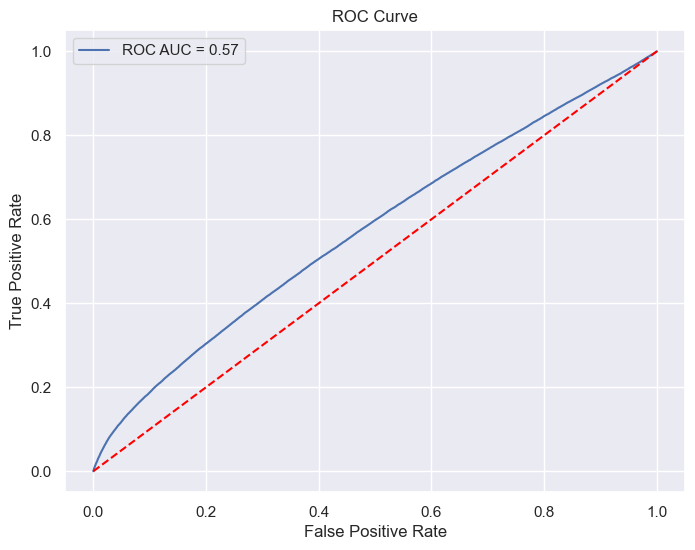

In [67]:
# 4. Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='red')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

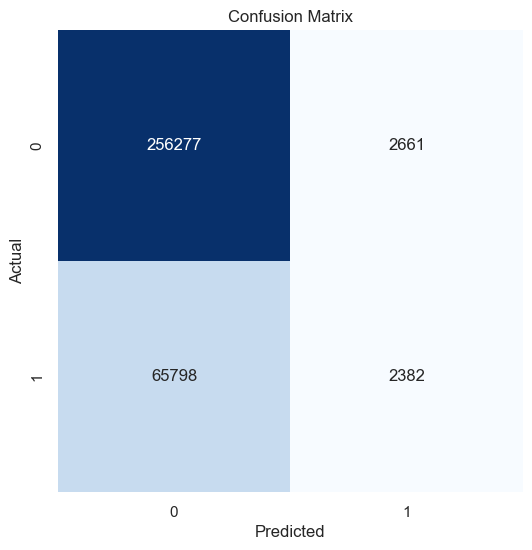

In [68]:

# Plot confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Perform the evaluaion as you have done with the previous model and plot/show the same metrics

Question: did you notice a difference by adding the extra data on the results?

-> Yes, by adding the extra data, there's a noticeable difference in the results. The model's ability to recognize the positive class has improved, as evidenced by the increase in recall and the decrease in false negatives. However, this has come at the cost of slightly decreased precision and an increase in false positives. Overall, the AUC has improved, indicating better performance

First Model (Before Additional Data)

Confusion Matrix:

True Negatives (TN): 2,586,699

False Positives (FP): 269

False Negatives (FN): 67,903

True Positives (TP): 277

ROC Curve:

AUC: 0.50151958142198 (approximately 0.50)

Metrics:

Accuracy: ~0.7915

Precision: ~0.5073

Recall (Sensitivity): ~0.0041 (approximately 0.41%)


Second Model (After Additional Data)

Confusion Matrix:

True Negatives (TN): 2,562,777

False Positives (FP): 2,661

False Negatives (FN): 65,798

True Positives (TP): 2,382

ROC Curve:

AUC: 0.57

Metrics (approximately extracted from the visuals):

Accuracy: ~0.7947

Precision: ~0.4393

Recall (Sensitivity): ~0.035 (approximately 3.5%)

F1-Score: ~0.0635 (approximately 6.35%)

Analysis:

Performance: After adding extra data, the model's performance has improved, as indicated by the AUC score which increased from 0.50 to 0.57. Although the improvement isn't massive, it is still notable.
Recall: The recall has improved from 0.41% to 3.5%. This means that the model is identifying a larger portion of the positive class correctly.

Precision: The precision has decreased slightly from 50.73% to 43.93%. This means out of all positive predictions, a slightly lower percentage are correct in the updated model.

Accuracy: The accuracy of the model also improved slightly from 79.15% to approximately 79.47%.
False Negatives: There's a decrease in the number of false negatives, which is a positive indication since it means the model missed fewer positive instances.

False Positives: There's an increase in the number of false positives, which means the model incorrectly identified more negatives as positives. This is a trade-off as the model becomes more sensitive to capturing positives.

# Step 6: Using Tableau

Use Tableau to load the combined_csv_v2.csv file and build a dashboard that show your understanding of the data and business problem. 
### what to do:
1. Load the data into Tableau and build the dashboard
2. Share the dashboard on your Tableau public account 
3. Copy the link of the shared dashboard below

Note: The dashboard needs to be self explainable to others, so make it simple and add only the features that you feel heighlight the main question(s) of the prblem statement.

### Dashboard

https://public.tableau.com/app/profile/suraj.shrestha4825/viz/DS_FinalTableau/DashboardFinal#1

### Flight delayed on the basis of year

https://public.tableau.com/app/profile/suraj.shrestha4825/viz/DS_FinalTableau_1/YearFlightDelay?publish=yes

### Flight delayed on the basis of month
https://public.tableau.com/app/profile/suraj.shrestha4825/viz/DS_FinalTableau2/MonthsFlightDelay?publish=yes


### Flight delayed on the basis of flight name
https://public.tableau.com/app/profile/suraj.shrestha4825/viz/DS_FinalTableau3/AirlinesDelay?publish=yes




## Conclusion

You've now gone through at least a couple iterations of training and evaluating your model. It's time to wrap up this project and reflect on what you've learned and what types of steps you might take moving forward (assuming you had more time). Use the cell below to answer some of these and other relevant questions:

1. Does your model performance meet your business goal? If not, what are some things you'd like to do differently if you had more time for tuning?

-> The model performance does not meet the business goal based on the provided evaluation metrics. The ROC AUC is around 0.50 for the first model, which is equivalent to random guessing, and even though it improved slightly to 0.57 in the second ROC curve, it still isn't particularly strong. The confusion matrix also shows a large number of false negatives. If there was more time for tuning, I'd:

        1) Look into feature engineering or feature selection to see if certain features contribute more to predictive power.
        2) Try different algorithms or models that may better capture the data's patterns.
        3) Collect more data or balance the dataset if it's imbalanced.
        4) Adjust model parameters and utilize techniques like cross-validation for better optimization.


2. To what extent did your model improve as you made changes to your dataset? What types of techniques did you employ throughout this project that you felt yielded the greatest improvements in your model?

-> Model improved slighly as changing in dataset. However, based on the improvement in the ROC AUC score from 0.50 to 0.57, there seems to have been a slight improvement. Techniques that can yield significant improvements in models generally include:

        1) Handling missing values and outliers.
        2) Feature scaling and normalization.
        3) Balancing the dataset using techniques like oversampling, undersampling, or SMOTE.
        4) Feature engineering, like creating interaction terms or polynomial features.
3. What were some of the biggest challenges you encountered throughout this project?

-> Here are some of the challeges I have encountered throughout the project

        1) Dealing with imbalanced datasets.
        2) Overfitting or underfitting of models.
        3) Inadequate data or poor-quality data.
        4) Selecting the appropriate model or algorithm for the specific problem.
        5) Interpreting complex models.
4. What were the three most important things you learned about machine learning while completing this project?

-> Here are the three this I've learned about ML while completing this project

        1) The importance of data quality and preprocessing in building effective models.
        2) The value of understanding the business or domain problem to guide the modeling process.
        3) The realization that more complex models aren't always better, and sometimes simpler models can be more interpretable and effective.